In [6]:
import json

with open('results.json') as f:
    results = json.load(f)

In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
def plot_instances(features):
    fig, axes = plt.subplots(1, 20)
    fig.set_size_inches(30, 5)
    for i, ax in enumerate(axes):
        image = plt.imread(features[i][0])
        label = float(features[i][1])
        # image = image / 255.0
        ax.set_title(f"{label:.3f}")
        ax.imshow(image)
        ax.set_axis_off()
    plt.show()

In [9]:
def visualize_concept(concept_id=0):
    print(f"Concept #{concept_id}")
    print()
    pair = results[concept_id]
    print(pair["concept"])
    plot_instances(pair["feature"])

Concept #0

[['blue', 0.8005970276468168], ['four', 0.21652453621713127], ['red', 0.17750145606393736], ['green', 0.14357911982550853], ['color', 0.11215693496248424], ['right', 0.07803374232827322], ['left', 0.07749839475217185], ['position', 0.07212578444249504], ['up', 0.0641747017378239], ['shape', 0.058059928039225134]]


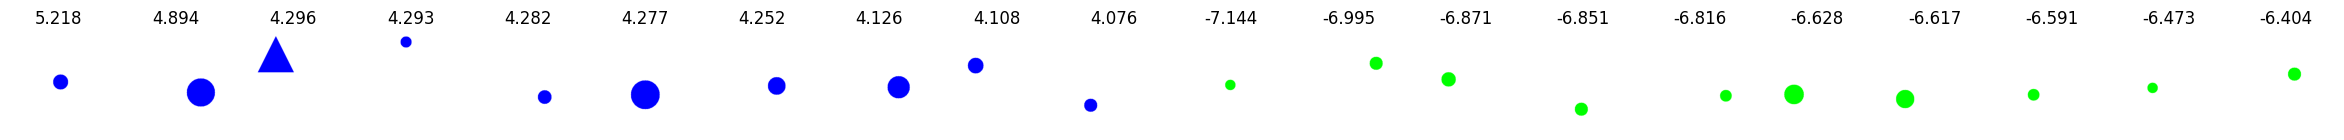

Concept #1

[['four', 0.23554617120483057], ['blue', 0.17093494933068268], ['blank', 0.1677262569926294], ['color', 0.1669278385031837], ['red', 0.1532784943294719], ['white', 0.1342218969537431], ['position', 0.11584217810856941], ['left', 0.09139829536082225], ['angle', 0.08948556953450529], ['this', 0.07656540100773175]]


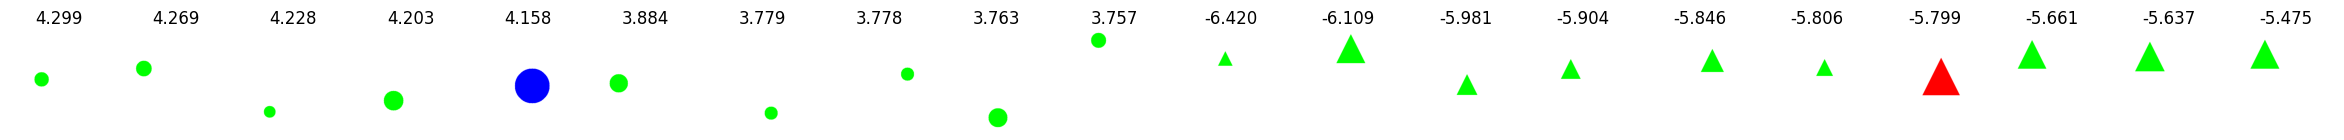

Concept #2

[['three', 0.9919111134560128], ['red', 0.3973345004953444], ['green', 0.2643577451874479], ['round', 0.22094729995824458], ['four', 0.1590243783787014], ['bottom', 0.08072180617502368], ['shape', 0.04893971391105494], ['has', 0.04238450764877177], ['this', 0.03555261691023285], ['left', 0.03545440463795947]]


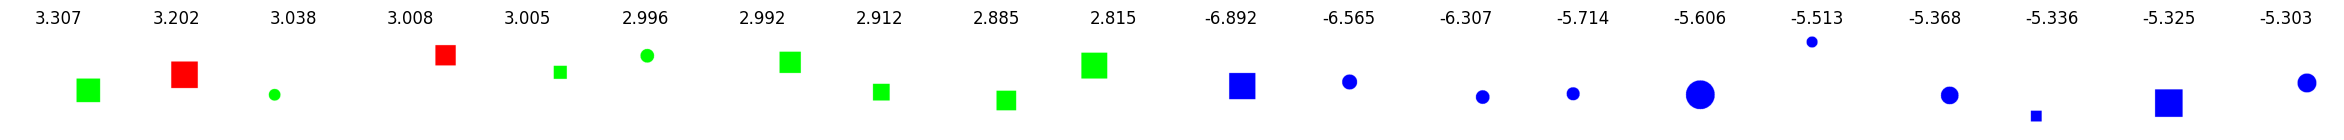

Concept #3

[['blue', 0.7323118502531595], ['angle', 0.26428911117761117], ['left', 0.19815457489329844], ['color', 0.11084364803613929], ['shape', 0.08041346968128914], ['this', 0.060133957070346446], ['red', 0.05581901997206657], ['has', 0.04826761076938573], ['blank', 0.03904935975059713], ['canvas', 0.03558680700708615]]


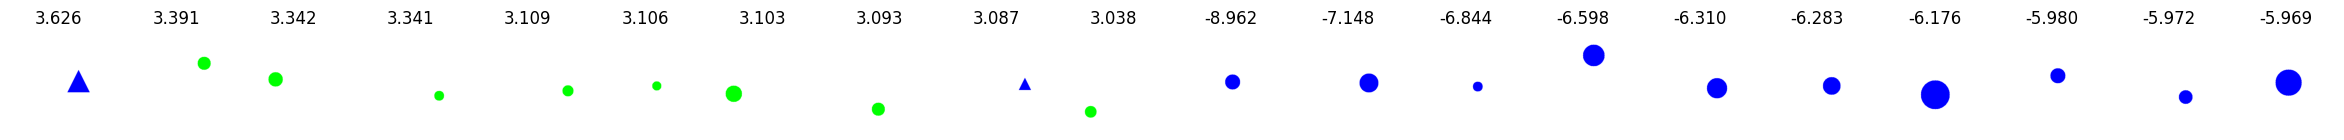

Concept #4

[['red', 0.8010964306389413], ['blue', 0.4306889359422815], ['three', 0.23313371038776104], ['green', 0.16159073234937055], ['color', 0.12628851130284208], ['round', 0.09992024970006168], ['left', 0.06241526831974731], ['unrotate', 0.05404796843455588], ['is', 0.05089541013102706], ['position', 0.044764147305149375]]


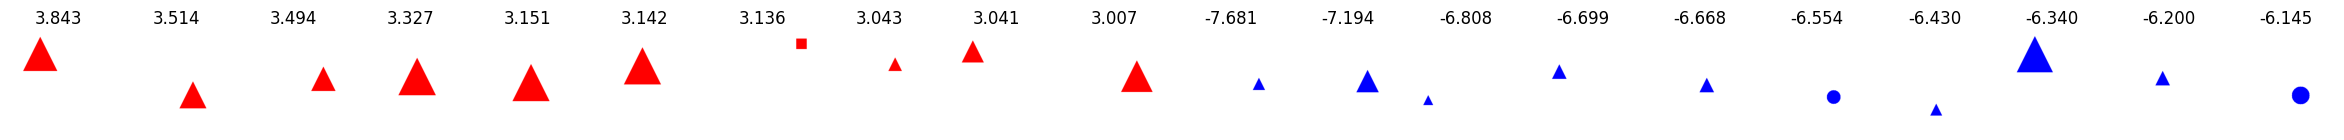

Concept #5

[['red', 0.8138421664393045], ['three', 0.3722942812534852], ['four', 0.24857751970610967], ['round', 0.24419961477198251], ['blue', 0.1281204164270463], ['angle', 0.09237771530037489], ['unrotate', 0.062001271177316825], ['up', 0.05489600691582061], ['this', 0.05019238753128181], ['shape', 0.04913646150531808]]


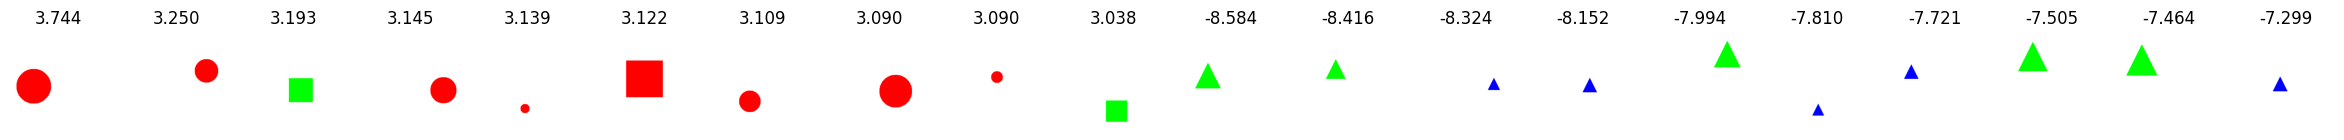

Concept #6

[['green', 0.8539306547583603], ['red', 0.545765264150573], ['three', 0.38789174602768284], ['blue', 0.16777664379375737], ['round', 0.06817370972679399], ['angle', 0.06808815570018156], ['color', 0.05076084685509363], ['four', 0.04174315892917112], ['bottom', 0.04155411463696989], ['right', 0.038983742102589584]]


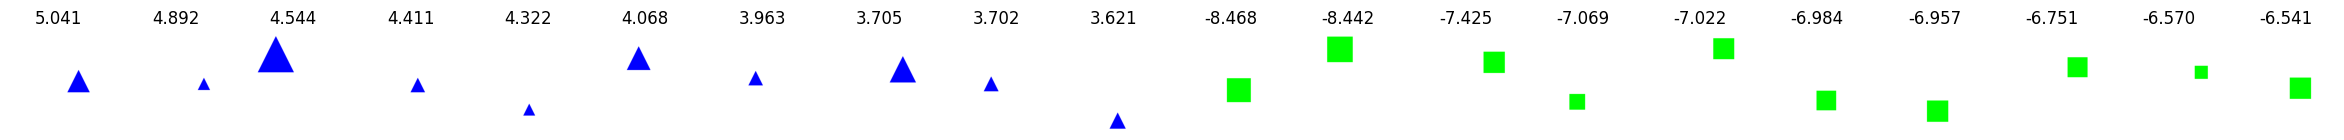

Concept #7

[['blue', 0.6139240608465426], ['red', 0.5199793066325923], ['three', 0.4028298466670804], ['color', 0.3327149639350329], ['green', 0.15487382892416662], ['four', 0.05768646756565668], ['position', 0.026892776353421008], ['has', 0.017486455946653413], ['round', 0.016001849085455988], ['white', 0.015346129212358266]]


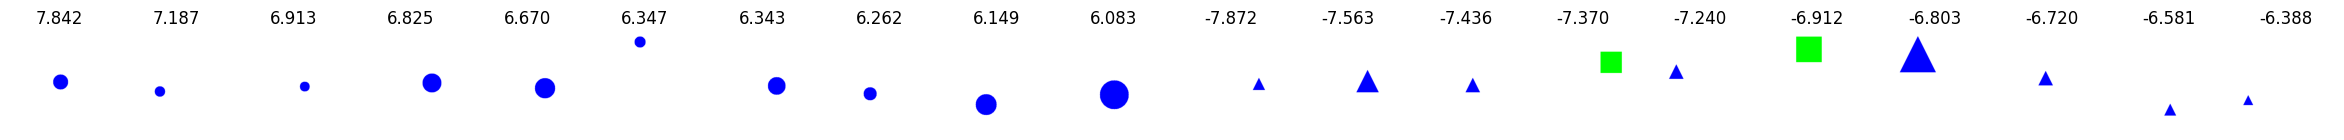

Concept #8

[['four', 0.7451722111643815], ['green', 0.6844954260965673], ['red', 0.2742898568511009], ['round', 0.18635172810011763], ['canvas', 0.07795073245260814], ['three', 0.063413345335218], ['bottom', 0.0589907951418015], ['color', 0.057660974335268664], ['shape', 0.055353139665452286], ['up', 0.052650051730236326]]


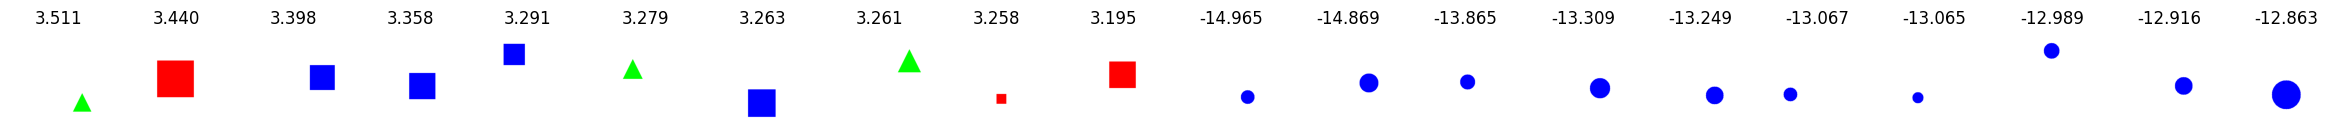

Concept #9

[['green', 0.7053033026253305], ['blue', 0.7018417386504693], ['four', 0.6428506616169845], ['round', 0.2762284269662407], ['three', 0.09738040810405481], ['color', 0.06558770080391055], ['angle', 0.04602172638297202], ['red', 0.03384419716213171], ['shape', 0.022796189331835727], ['is', 0.016737088568629772]]


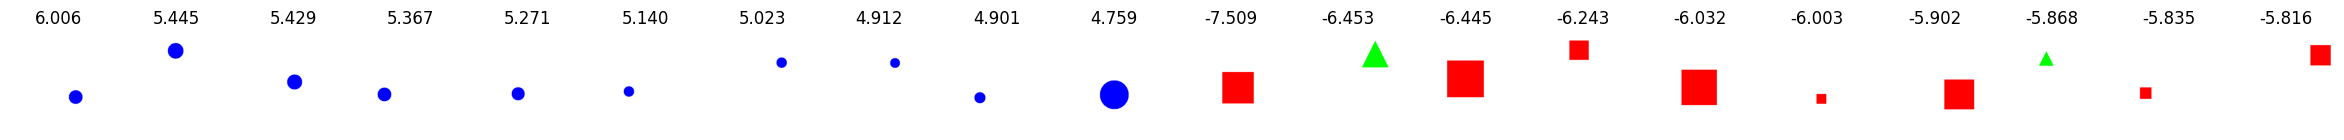

In [10]:
for i in range(10):
    visualize_concept(i)